# Load Data

In [15]:
# images are in ./dataset/khalil and ./dataset/others
# labels are the folder names
# load the data

import os
import numpy as np

data_path = './dataset'
folders = os.listdir(data_path)
labels = []
images = []

# each image has a label. labels are the folder names.
for folder in folders:
    folder_path = os.path.join(data_path, folder)
    for image in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image)
        images.append(image_path)
        labels.append(folder)

# convert to numpy arrays
images = np.array(images)
labels = np.array(labels)
print(images)
print(labels)


['./dataset/khalil/image00007.jpeg' './dataset/khalil/image00008.jpeg'
 './dataset/khalil/image00020.jpeg' './dataset/khalil/image00021.jpeg'
 './dataset/khalil/image00022.jpeg' './dataset/khalil/image00033.jpeg'
 './dataset/khalil/image00038.jpeg'
 './dataset/khalil/photo_2022-11-06_14-49-18.jpg'
 './dataset/khalil/photo_2022-11-06_14-50-06.jpg'
 './dataset/others/106.jpg' './dataset/others/29.jpg'
 './dataset/others/332.jpg' './dataset/others/409.jpg'
 './dataset/others/43.jpg' './dataset/others/80.jpg'
 './dataset/others/90.jpg']
['khalil' 'khalil' 'khalil' 'khalil' 'khalil' 'khalil' 'khalil' 'khalil'
 'khalil' 'others' 'others' 'others' 'others' 'others' 'others' 'others']


# Image Preprocessing

## HaaR Cascade Face Detection

In [16]:
# detect faces in the image and extract the face

import cv2
haar_file = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

def face_extractor(img):
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if faces is ():
        return None
    for (x, y, w, h) in faces:
        cropped_face = img[y:y+h, x:x+w]
    return cropped_face








<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_18098/1183852421.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


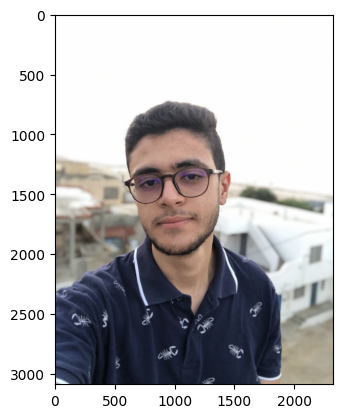

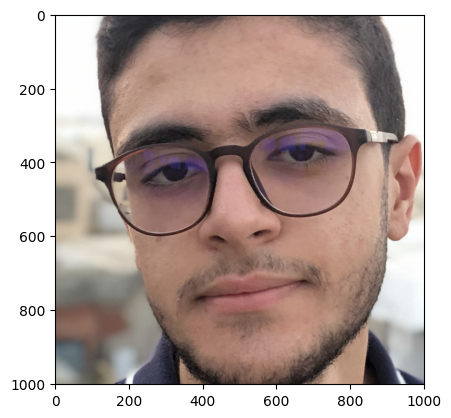

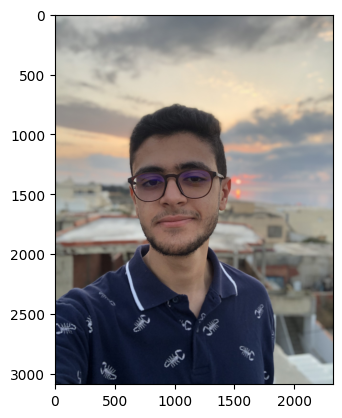

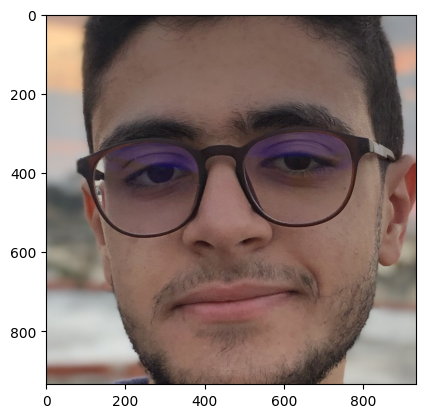

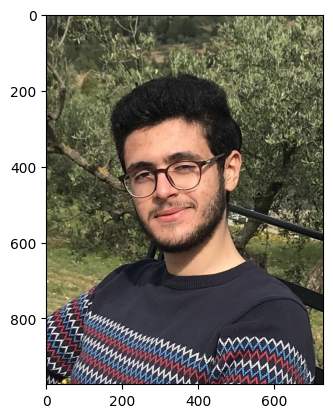

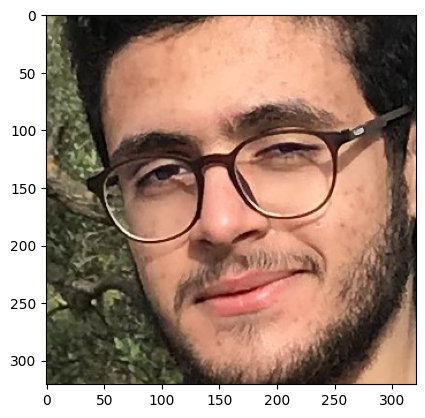

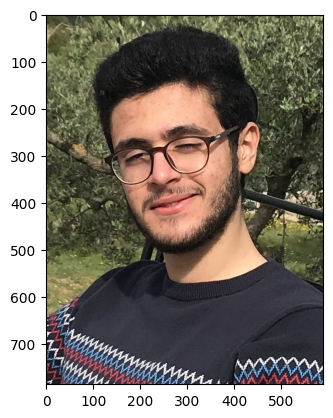

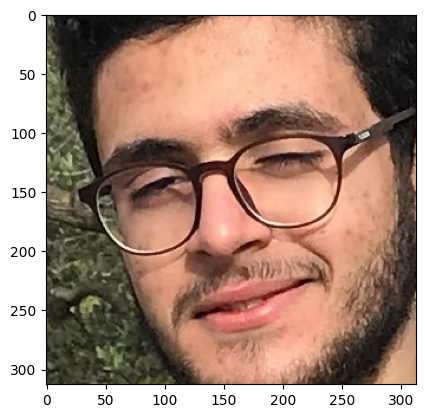

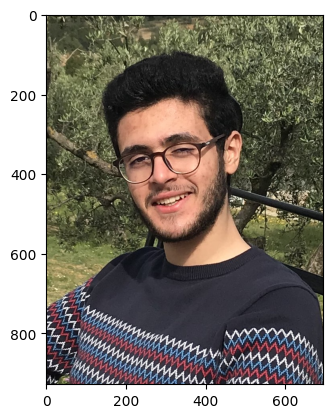

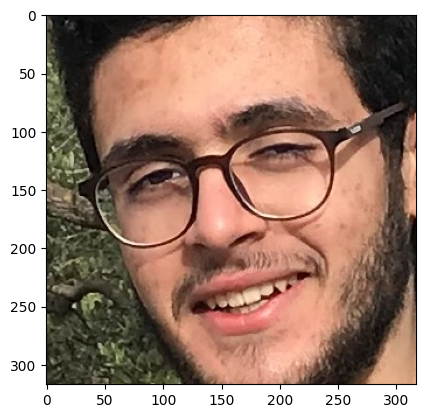

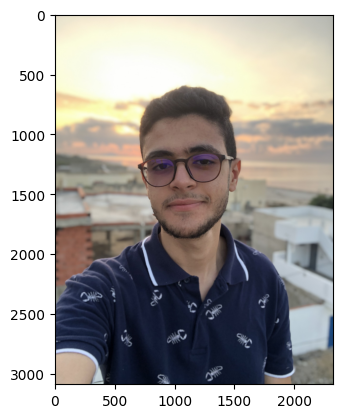

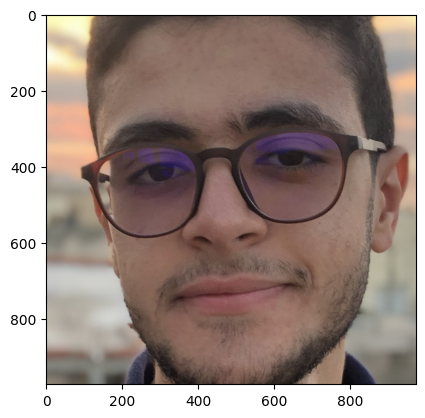

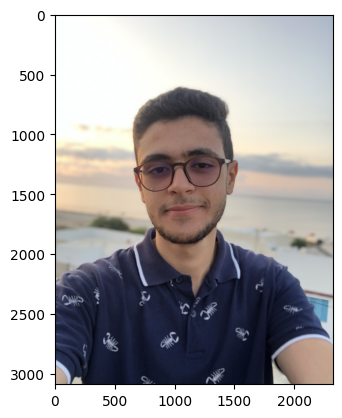

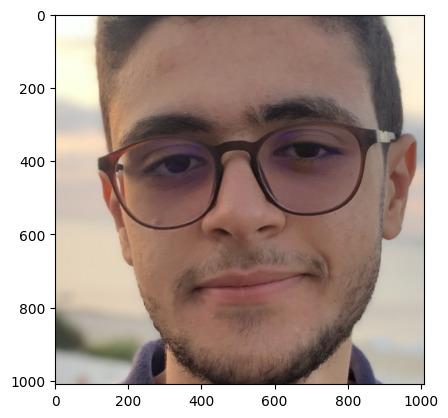

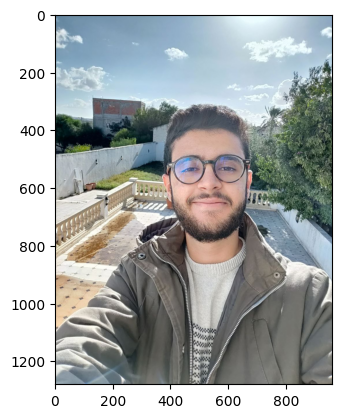

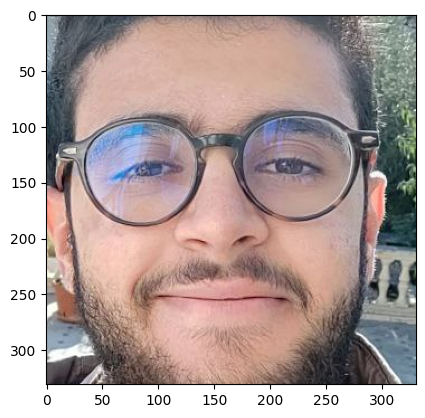

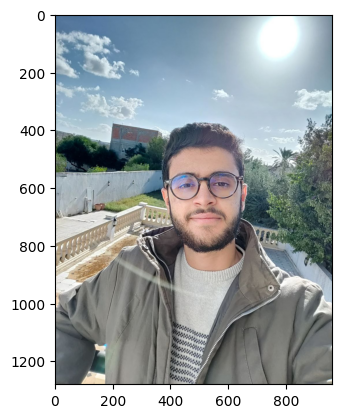

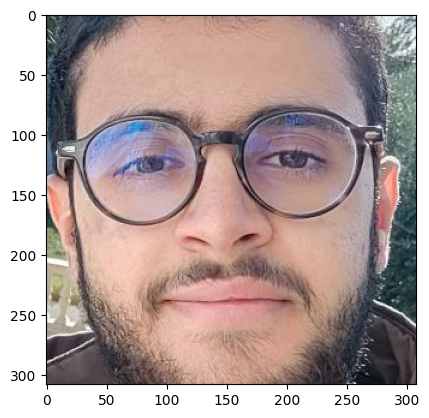

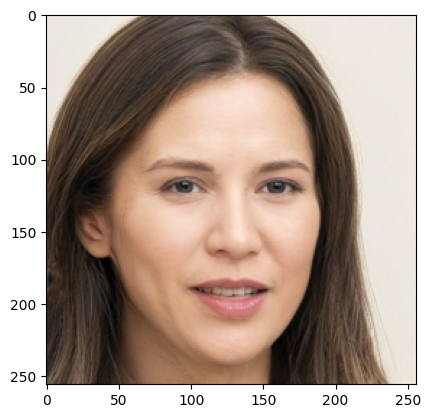

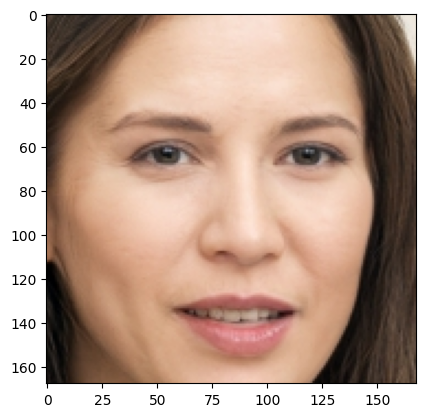

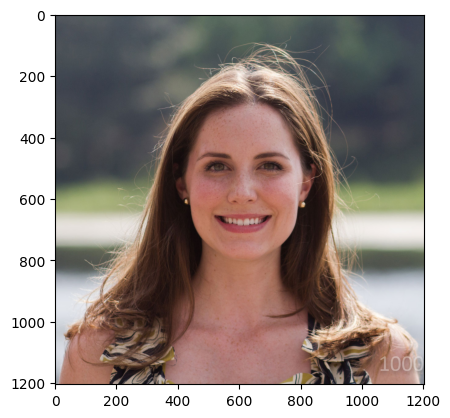

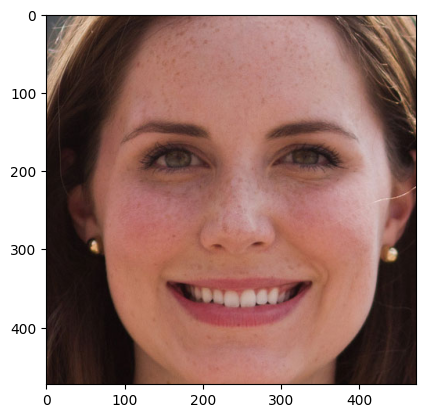

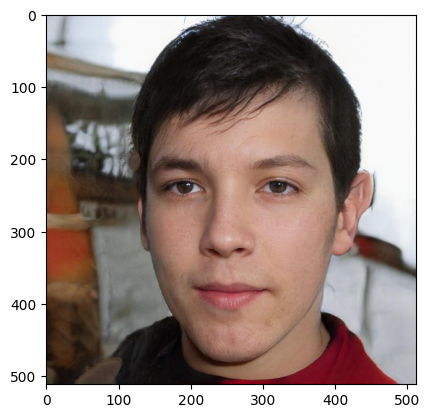

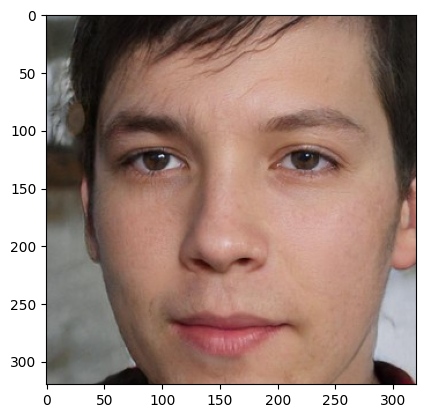

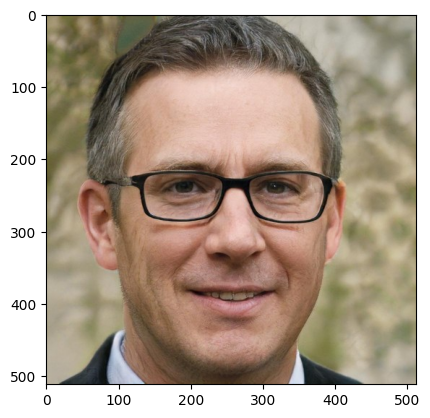

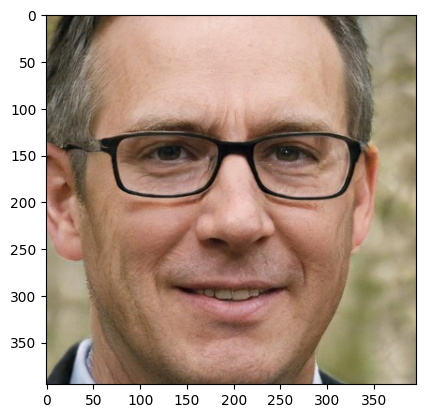

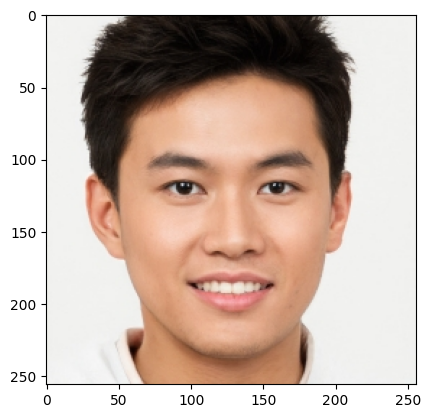

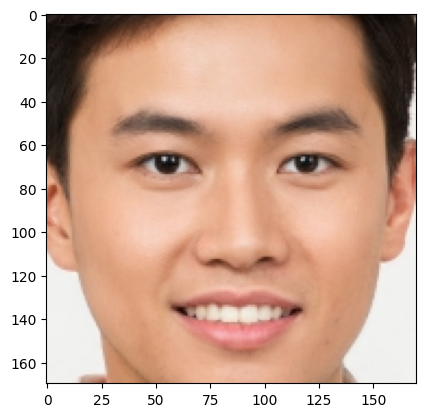

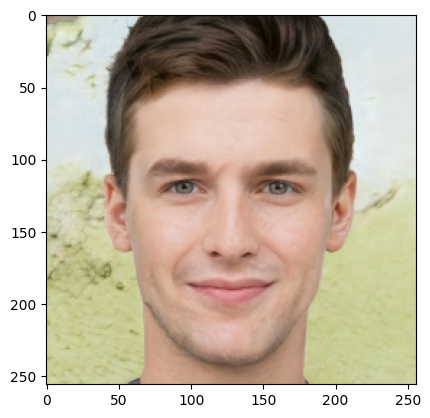

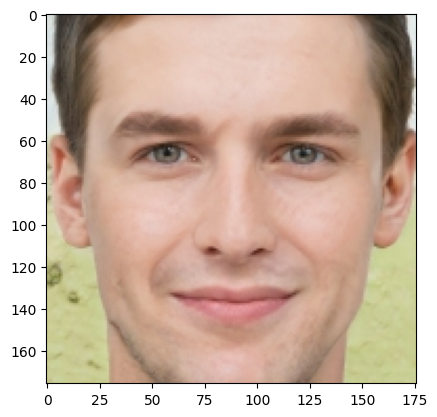

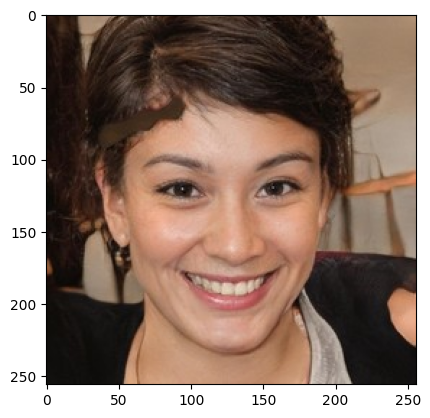

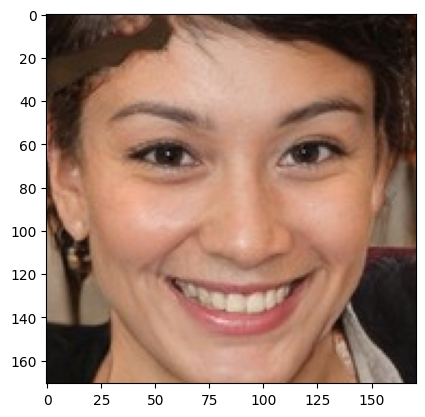

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for image in images:
    img = mpimg.imread(image)
    plt.imshow(img)
    plt.show()
    face = face_extractor(img)
    if face is not None:
        plt.imshow(face)
        plt.show()
    else:
        print('Face not found')

In [19]:
# save the faces in "processed" folder. The folder will be created if it doesn't exist.
# the faces are saved with the name of the folder they belong to (label) and a number.
processed_path = './processed'
if not os.path.exists(processed_path):
    os.mkdir(processed_path)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i, image in enumerate(images):
    img = cv2.imread(image)
    face = face_extractor(img)
    if face is not None:
        face = cv2.resize(face, (200, 200))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        save_path = os.path.join(processed_path, labels[i])
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        file_name_path = os.path.join(save_path, labels[i] + str(i) + '.jpg')
        cv2.imwrite(file_name_path, face)
        cv2.waitKey(0)
    else:
        print('Face not found')
        pass



# Face Recognition

## CNN Model

### Training

### Testing

### Evaluation

# Deployment